# Analysis 1:

# Find the ratio of flights delayed to total number of flights every year and sort them in descending order.


/Users/Sneha/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Sneha/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Sneha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Sneha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

    Year Not_delayed Delayed_flights    Ratio
16  1995       50351           49649  0.49649
18  1996       51031           48969  0.48969
14  1994       54196           45804  0.45804
12  1993       55147           44853  0.44853
10  1992       55464           44536  0.44536


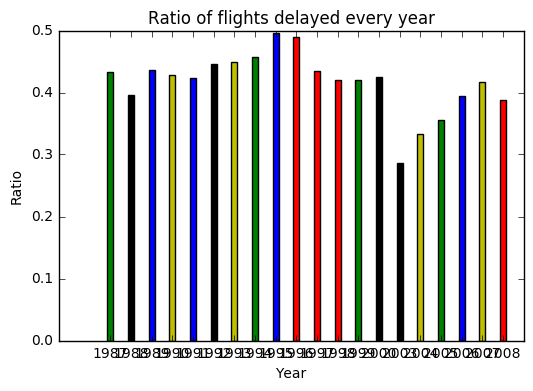

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice

#Reading the CSV file from the disk
loc= '/Users/Sneha/Downloads/Final_dataset.csv'
data = pd.read_csv(loc)

#Filling the NAN with 0 for DepTime and ArrTime columns
data['DepTime'].fillna(0,inplace=True)
data['ArrTime'].fillna(0,inplace=True)

#Convert the columns to int
data.DepTime=data.DepTime.astype(int)
data.ArrTime=data.DepTime.astype(int)

#Picking the required columns
req_data=data[['Year','DepTime','CRSDepTime']]

#Function to split the time column to hours and minutes
def split_time(v):
    #Converting the time to string to perfomr split
    v=str(v)
    if v=='0':
        return 0,0
    if len(v)<4:
        #Fill 0 whe lenght is not equal to 4
        v=v.zfill(4)
    v1=v[0:2]
    v2=v[2:4]
    return int(v1),int(v2)

#Calling the function to split the time
req_data["Act_Dep1"],req_data["Act_Dep2"]=zip(*req_data["DepTime"].map(split_time))
req_data["Sc_Dep1"],req_data["Sc_Dep2"]=zip(*req_data["CRSDepTime"].map(split_time))

#Function to calculate the delay
def delay_cal(y):
    #If the hour is same then just calculate the difference
    if(y[3]==y[5]):
        return y[4]-y[6]
    else:
        #If greater then calculate delay based on hours passed
        if(y[3] > y[5]):
            num= (y[3] - y[5])
            y[6]=60*num-y[6]
            return(y[4]+y[6])
        else:
            #If no delay then return -1
            return -1

#Applying the delay function to all the rows
req_data['delay']=req_data.apply(delay_cal,axis=1)
#Function to check if delayed or not
def delayed(x):
    if(x[7]>0):
        return 1
    else:
        return 0

req_data['Delayed_flag']=req_data.apply(delayed,axis=1)
#Groupby based on Year and delayed flag
req_data=req_data.groupby(['Year','Delayed_flag']).size().reset_index(name='Count')


#Create new dataframe to transpose the values
col=['Year','Not_delayed','Delayed_flights']
df=pd.DataFrame(columns=col)

#Enter the year into the dataframe
def trans(a):
    #print(a[0])
    df.loc[len(df)]=[a[0],'0','0']

#Add the valued to the transposed dataframe
def add_val(s):
    if s[1]==0:
        df.loc[df.Year==s[0],'Not_delayed']=s[2]
    if s[1]==1:
        df.loc[df.Year==s[0],'Delayed_flights']=s[2]

req_data.apply(trans,axis=1)
df.drop_duplicates('Year', inplace=True)
req_data.apply(add_val,axis=1)
#Find the ratio of Delayed to total number of flights
df['Ratio']=df['Delayed_flights'] /(df['Not_delayed']+df['Delayed_flights'])
final= df.sort(['Ratio'], ascending=[False])

final['Year'].fillna(0,inplace=True)
final.Year=final.Year.astype(int)

print(final.head())
#Writing to csv
final.to_csv("output_Analysis_1.csv",index = False)

#Bar plot for the analysis
fig,ax = plt.subplots()
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']),  len(final))) #Specifying the colours
ax.bar(final.index, final.Ratio, align='center', width=0.6, color=my_colors)
ax.set_xticks(final.index+0.01)
ax.set_xticklabels(final.Year)

#To save the image
plt.savefig('/Users/Sneha/Downloads/Plot_Analysis_1.png')
#Plotting title
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Ratio of flights delayed every year')

plt.show()